In [1]:
from google_connector import *
from eeg_preprocessing import *
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mne_bids import write_raw_bids, BIDSPath

In [16]:
dirs = drive_folder("1XL74fi7YxV5-U0nXM1CqQU5051UR3I3m","STEM")
dirs.drive_client()
dirs.get_drive_files()
dirs.download_drive_files(keys=["A01285907_prod"])

getting A01285907_prod : eeg.csv
Download 100.
getting A01285907_prod : spatial_abilities_responses.csv
Download 100.
getting A01285907_prod : arithmetic_responses.csv
Download 100.
getting A01285907_prod : programming_responses.csv
Download 100.


In [2]:
subject_eeg = eeg('C:/Users/luisf/git_projects/Neuro_Engineering_Dev/neuro_education/2025FJ_STEM/STEM/CSV/eeg/A01285907_prod.csv')
subject_eeg.import_eeg_raw_unicorn()

Creating RawArray with float64 data, n_channels=9, n_times=328390
    Range : 0 ... 328389 =      0.000 ...  1313.556 secs
Ready.
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 750000.0625 to 0.05082893371582031
Columns: 328390 entries, 0 to 328389
dtypes: float64(328390)
memory usage: 22.5+ MB
None
None


In [3]:
subject_eeg.filter('highpass', subject_eeg.current_eeg)
subject_eeg.filter('notch', subject_eeg.current_eeg)

In [4]:
display(subject_eeg.current_eeg)

<RawArray | 9 x 328390 (1313.6 s), ~22.6 MiB, data loaded>

Using matplotlib as 2D backend.


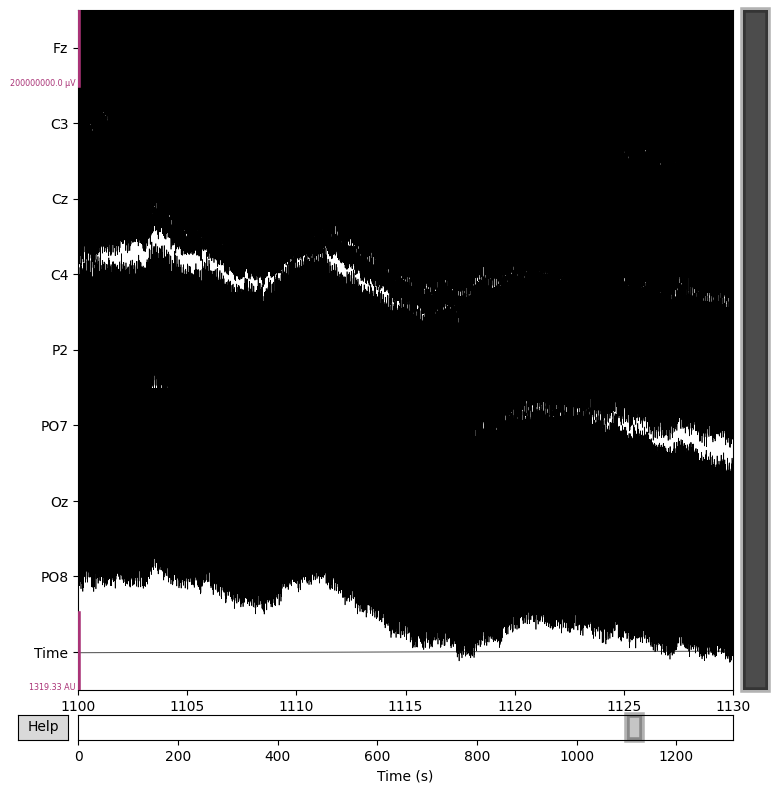

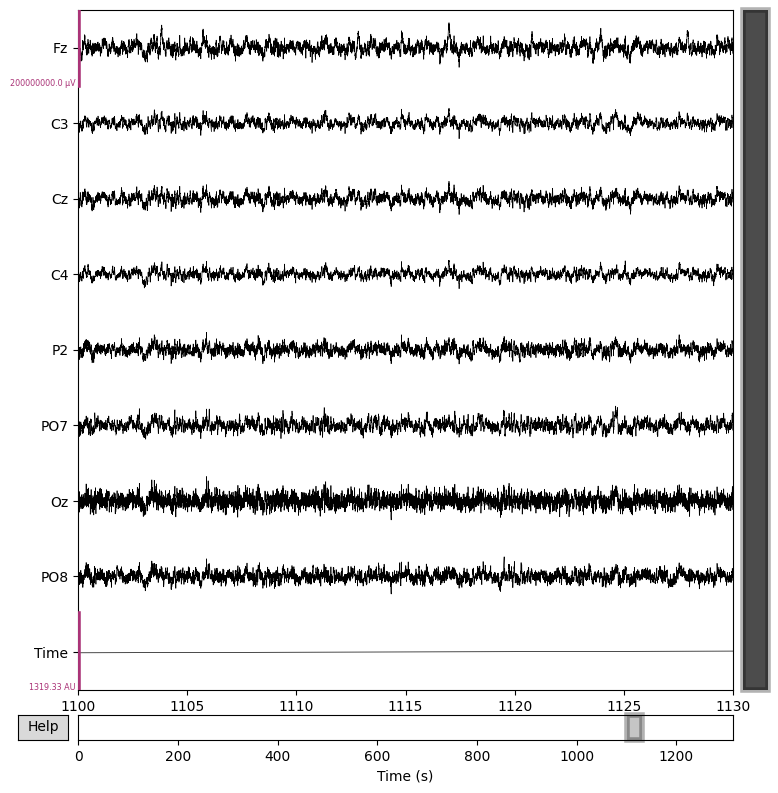

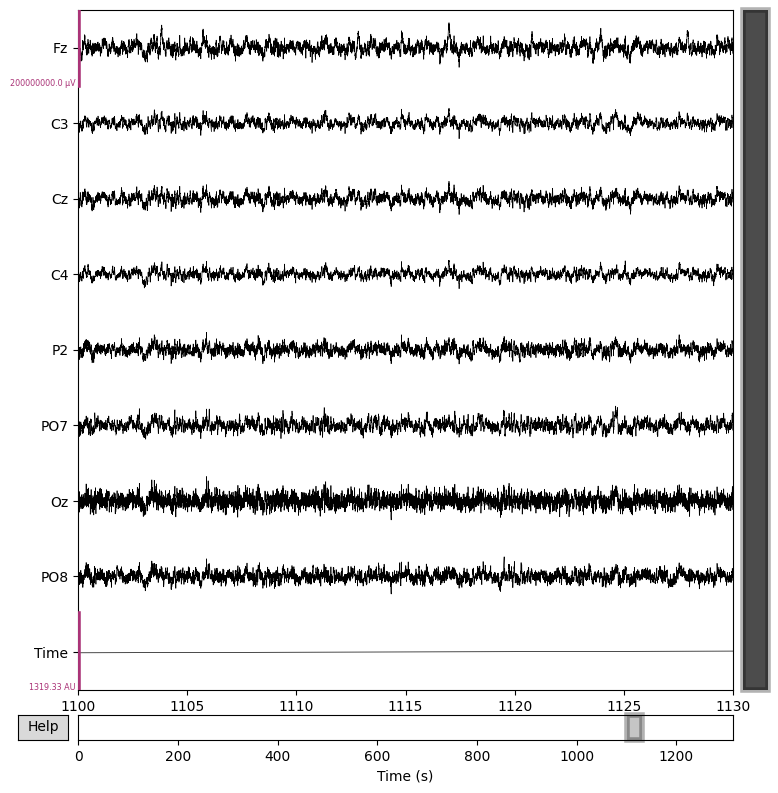

In [4]:
subject_eeg.eeg_raw.plot(
    scalings={'eeg': 100},
    duration=30,
    n_channels=len(subject_eeg.eeg_raw.ch_names),
    remove_dc=True,
    title='EEG with Custom Scaling',
    start=1100  # Start at second 300
)

subject_eeg.current_eeg.plot(
    scalings={'eeg': 100},
    duration=30,
    n_channels=len(subject_eeg.eeg_raw.ch_names),
    remove_dc=True,
    title='EEG with Custom Scaling',
    start=1100  # Start at second 300
)

In [5]:
bids_root='C:/Users/luisf/git_projects/Neuro_Engineering_Dev/neuro_education/2025FJ_STEM/STEM/S1_Test/'

In [7]:
subject_eeg.export_to_bids(
    bids_root='C:/Users/luisf/git_projects/Neuro_Engineering_Dev/neuro_education/2025FJ_STEM/STEM/S1_Test/',
)

Writing 'C:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\2025FJ_STEM\STEM\S1_Test\participants.tsv'...
Writing 'C:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\2025FJ_STEM\STEM\S1_Test\participants.json'...
Writing 'C:/Users/luisf/git_projects/Neuro_Engineering_Dev/neuro_education/2025FJ_STEM/STEM/S1_Test/sub-01/ses-01/eeg/sub-01_ses-01_space-CapTrak_electrodes.tsv'...
Writing 'C:/Users/luisf/git_projects/Neuro_Engineering_Dev/neuro_education/2025FJ_STEM/STEM/S1_Test/sub-01/ses-01/eeg/sub-01_ses-01_space-CapTrak_coordsystem.json'...
Writing 'C:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\2025FJ_STEM\STEM\S1_Test\dataset_description.json'...
Writing 'C:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\2025FJ_STEM\STEM\S1_Test\sub-01\ses-01\eeg\sub-01_ses-01_task-rest_run-01_eeg.json'...
Found no extension for raw file, assuming "BTi" format and appending extension .pdf
Writing 'C:\Users\luisf\git_projects\Neuro_Enginee

c:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\2025FJ_STEM\eeg_preprocessing.py:87: RuntimeWarning: Converting data files to BrainVision format
  write_raw_bids(
c:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\2025FJ_STEM\eeg_preprocessing.py:87: RuntimeWarning: Encountered data in "double" format. Converting to float32.
  write_raw_bids(
c:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\.venv\Lib\site-packages\pybv\io.py:682: UserWarning: Encountered unsupported non-voltage units: n/a
Note that the BrainVision format specification supports only µV.
  warn(msg)


Writing 'C:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\2025FJ_STEM\STEM\S1_Test\sub-01\ses-01\sub-01_ses-01_scans.tsv'...
Wrote C:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\2025FJ_STEM\STEM\S1_Test\sub-01\ses-01\sub-01_ses-01_scans.tsv entry with eeg\sub-01_ses-01_task-rest_run-01_eeg.vhdr.
BIDS export complete at: C:\Users\luisf\git_projects\Neuro_Engineering_Dev\neuro_education\2025FJ_STEM\STEM\S1_Test\sub-01\ses-01\eeg
